In [1]:
# Regression Models
import joblib
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures 
from sklearn.ensemble import (RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,
HistGradientBoostingRegressor) 

from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve,
cross_val_predict, cross_validate, permutation_test_score, validation_curve, StratifiedKFold, RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score, 
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

In [4]:
df = pd.read_csv('Student_Exam_Scores_env/student_habits_performance.csv')

In [5]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
sns.set(style='whitegrid')

In [7]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [10]:
import warnings 
warnings.filterwarnings('ignore')

In [11]:
df.describe(include='object')

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1000,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


In [12]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [13]:
cat_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
            'internet_quality', 'extracurricular_participation']

num_cols = ['age', 'study_hours_per_day', 'social_media_hours',	'netflix_hours', 'attendance_percentage',
            'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

In [14]:
for col in cat_cols: 
    print(f'Value counts of {df[col].value_counts()}\n')

Value counts of gender
Male      440
Female    433
Other      36
Name: count, dtype: int64

Value counts of part_time_job
No     713
Yes    196
Name: count, dtype: int64

Value counts of diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64

Value counts of parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

Value counts of internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64

Value counts of extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64



## Histogram

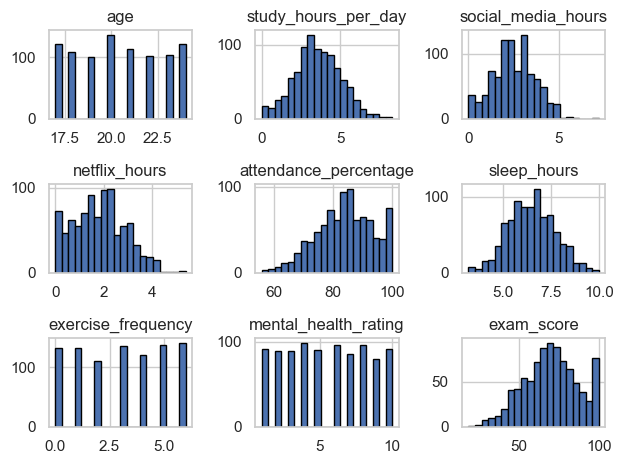

In [15]:
df.hist(bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

## Countplot

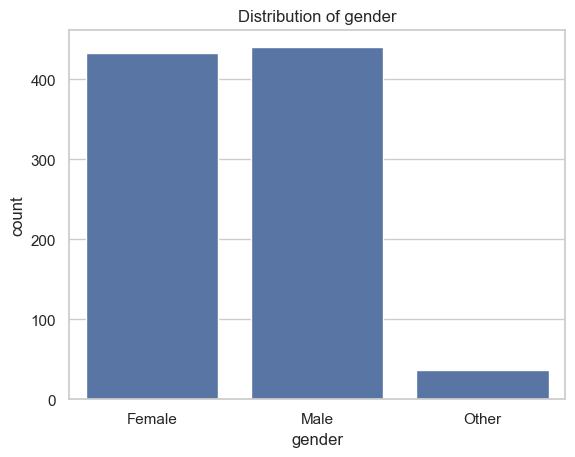

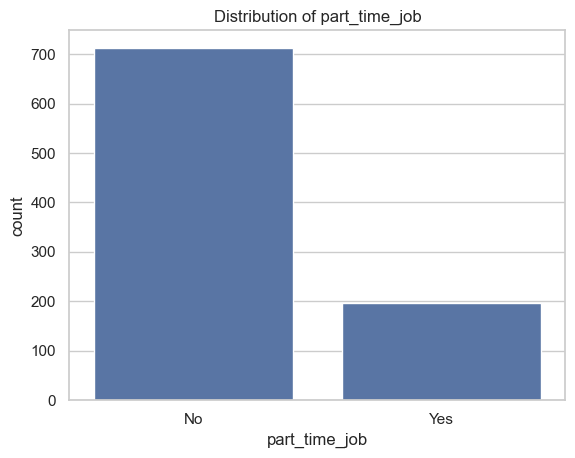

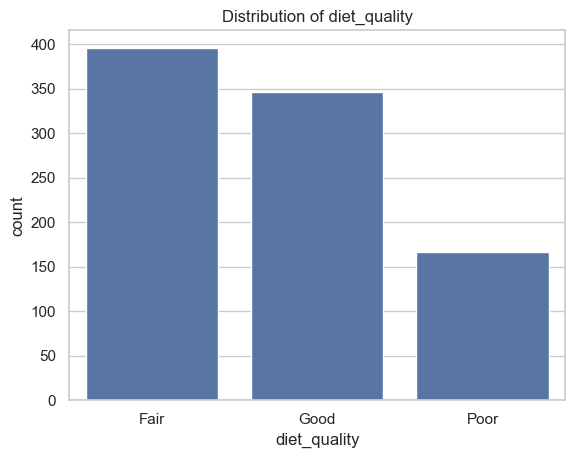

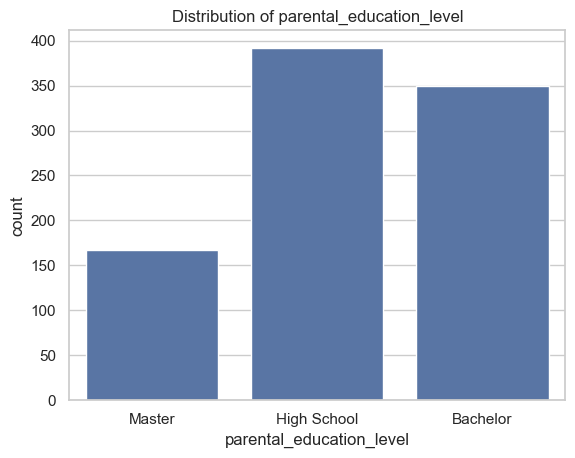

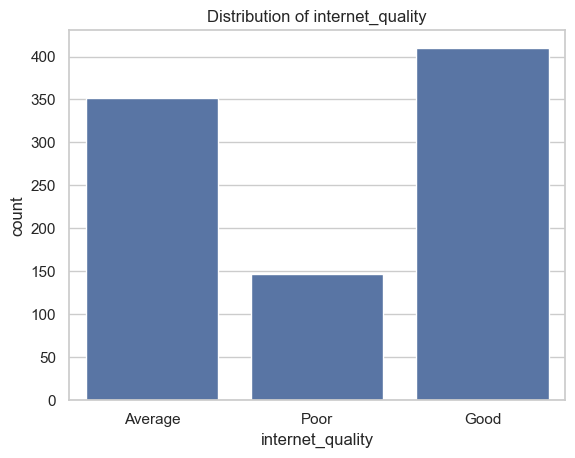

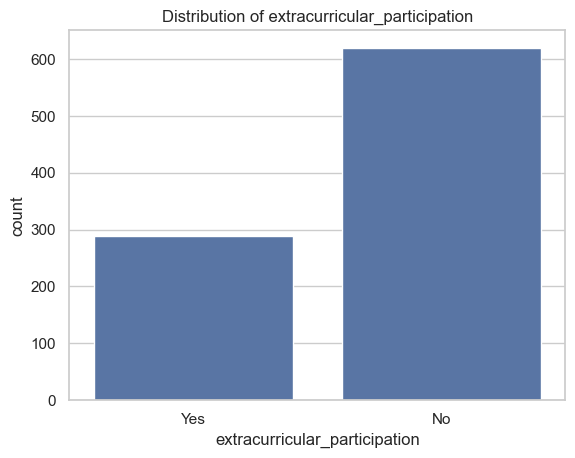

In [16]:
for col in cat_cols:
    sns.countplot(data=df, x= col)
    plt.title(f'Distribution of {col}')
    plt.xticks()
    plt.show()

## Heatmap

In [17]:
df.corr(numeric_only=True)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.007150,-0.023854,0.005841,-0.030203,0.040498,-0.005718,-0.052137,-0.012833
study_hours_per_day,0.007150,1.000000,0.007364,-0.014493,0.028967,-0.026241,-0.024708,-0.015896,0.822950
social_media_hours,-0.023854,0.007364,1.000000,0.011865,0.049356,0.026861,-0.023975,-0.000417,-0.171672
netflix_hours,0.005841,-0.014493,0.011865,1.000000,-0.015008,-0.017006,-0.004155,-0.016612,-0.166578
attendance_percentage,-0.030203,0.028967,0.049356,-0.015008,1.000000,0.001972,-0.010563,-0.017096,0.096005
sleep_hours,0.040498,-0.026241,0.026861,-0.017006,0.001972,1.000000,0.030013,-0.010653,0.122294
exercise_frequency,-0.005718,-0.024708,-0.023975,-0.004155,-0.010563,0.030013,1.000000,-0.001500,0.161397
mental_health_rating,-0.052137,-0.015896,-0.000417,-0.016612,-0.017096,-0.010653,-0.001500,1.000000,0.317945
exam_score,-0.012833,0.822950,-0.171672,-0.166578,0.096005,0.122294,0.161397,0.317945,1.000000


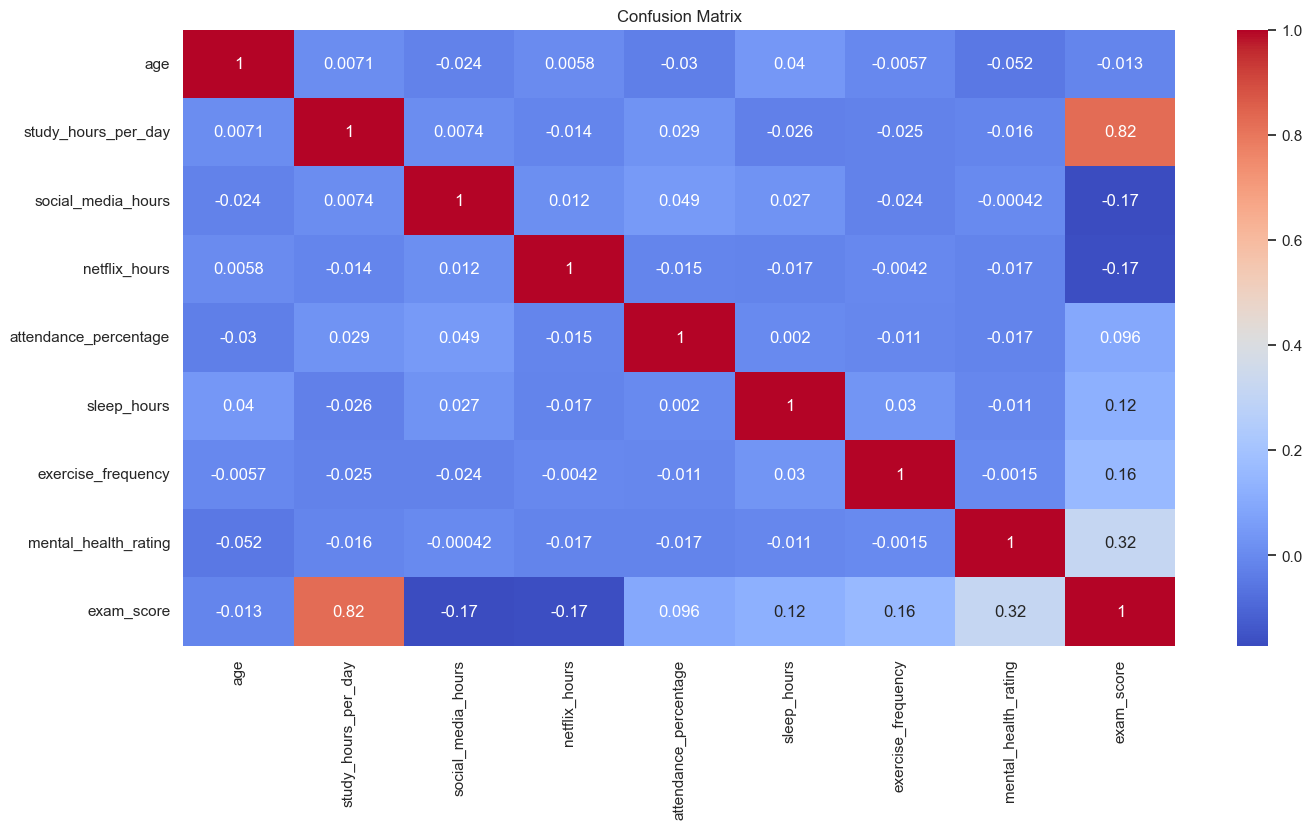

In [18]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

## Scatterplot

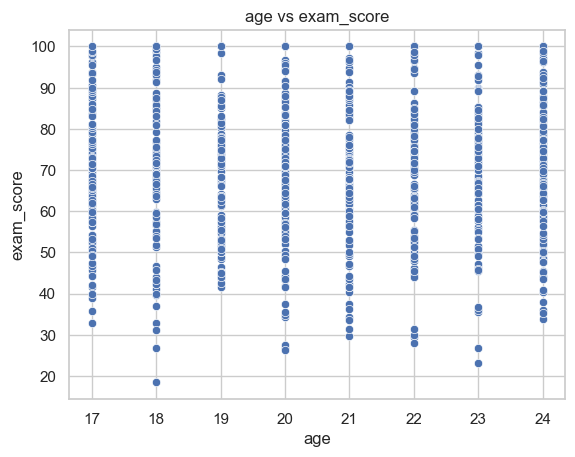

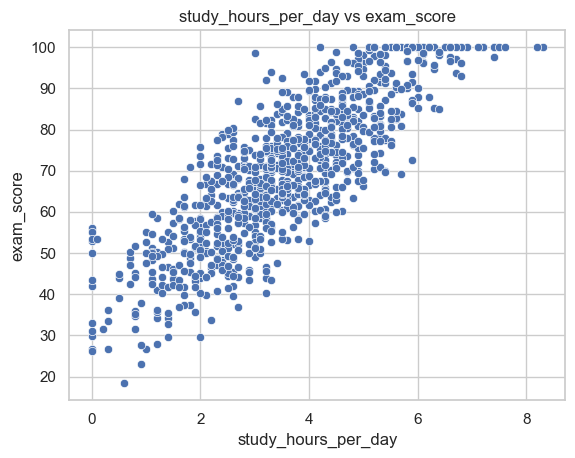

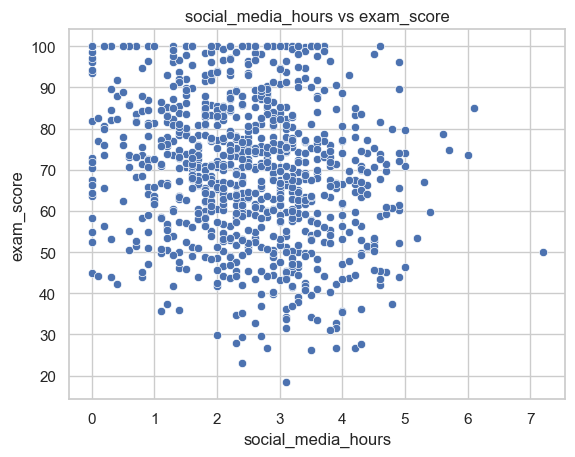

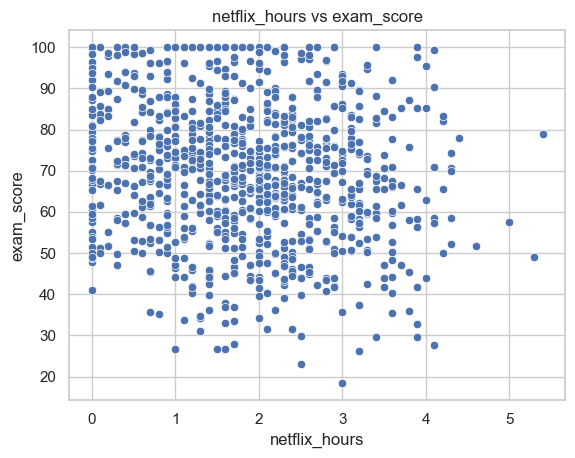

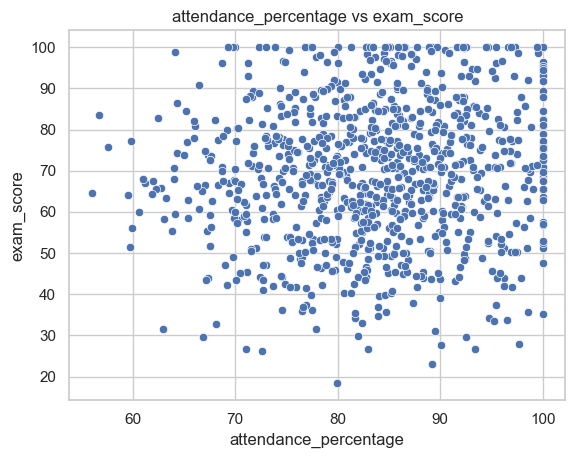

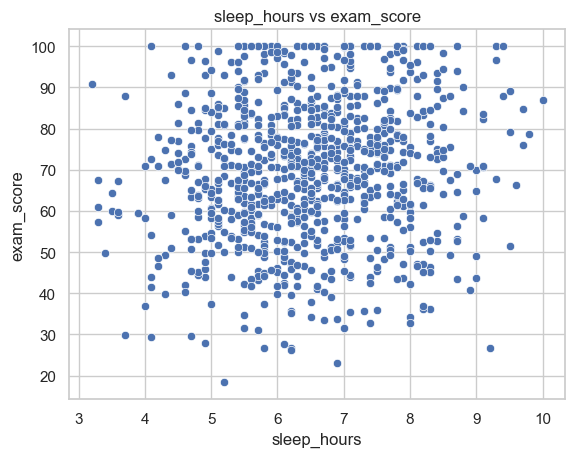

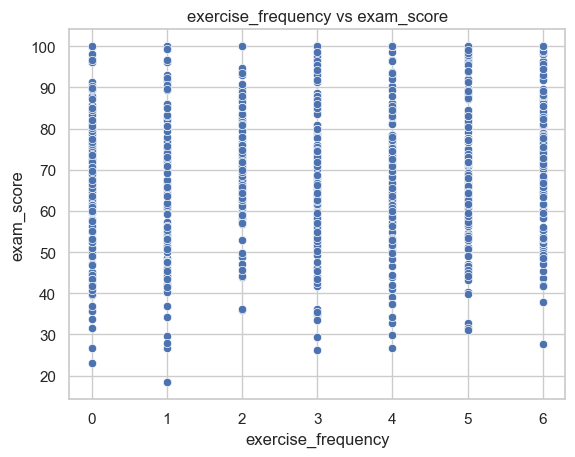

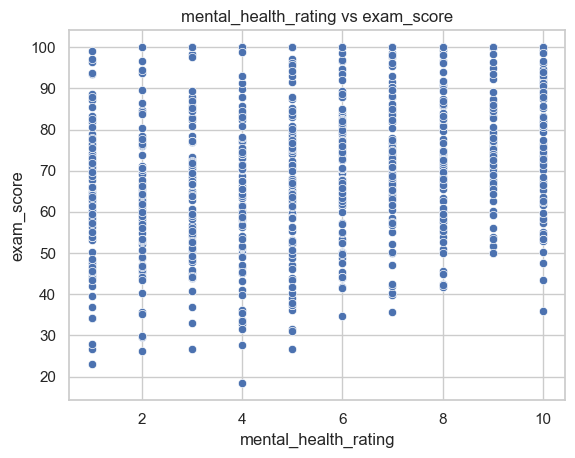

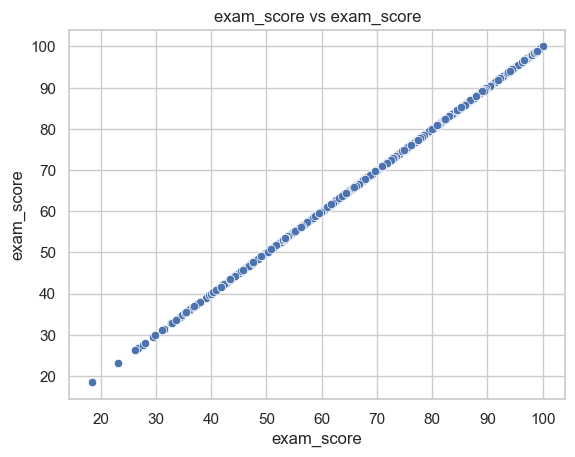

In [19]:
for feature in num_cols:
    sns.scatterplot(data=df, x=feature, y='exam_score')
    plt.title(f'{feature} vs exam_score')
    plt.show()

## Boxenplot & Boxplot

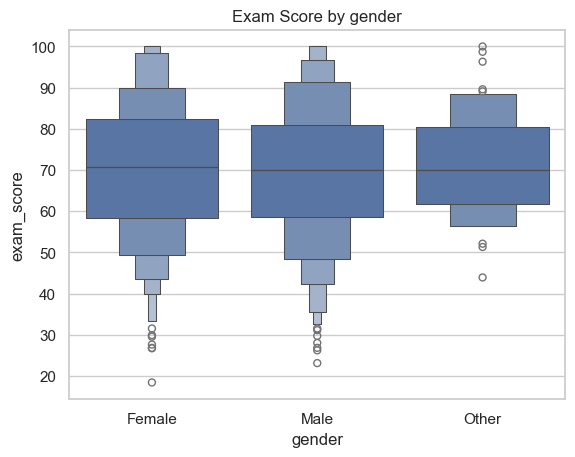

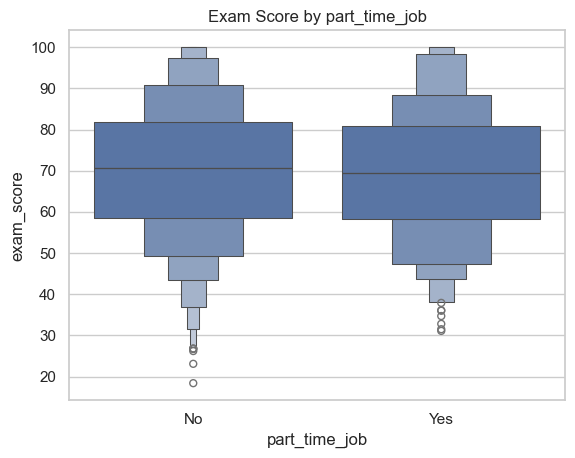

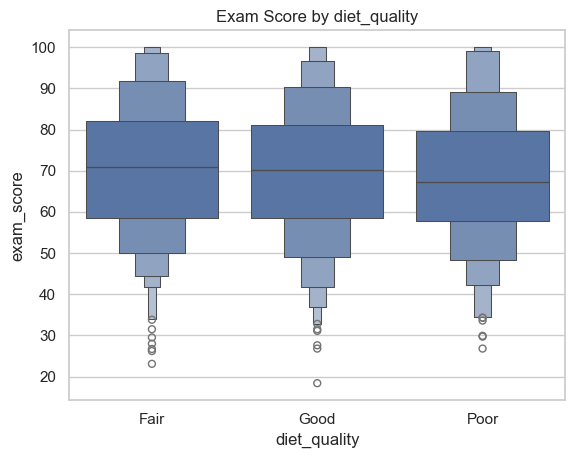

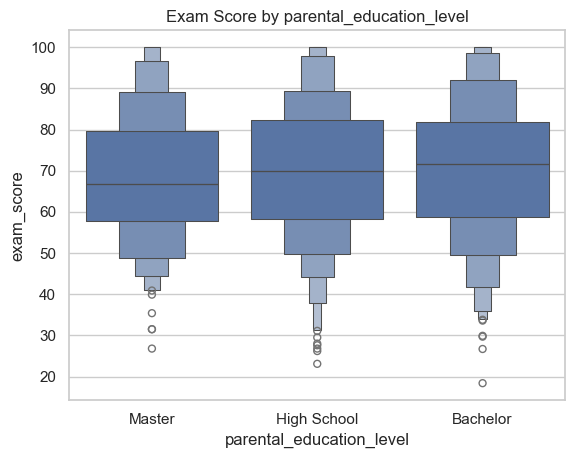

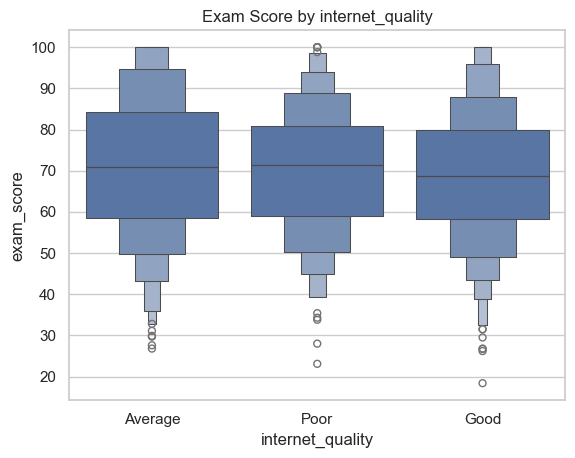

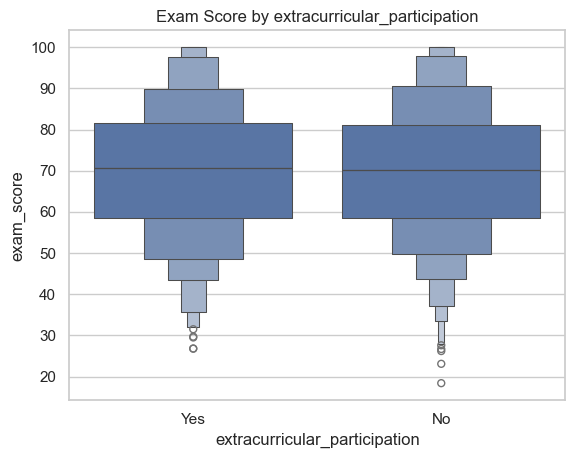

In [20]:
for col in cat_cols:
    sns.boxenplot(data=df, x=col, y='exam_score')
    plt.title(f'Exam Score by {col}')
    plt.show()

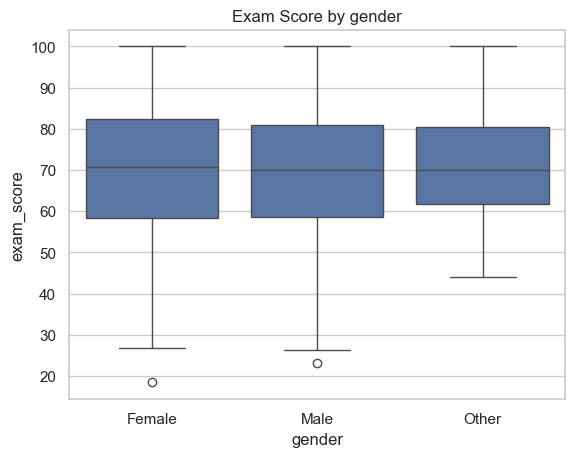

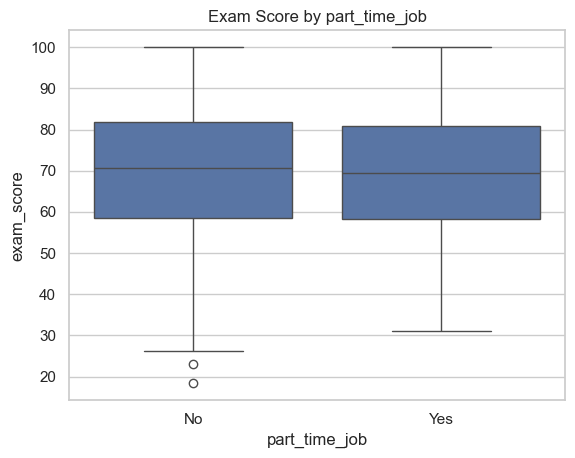

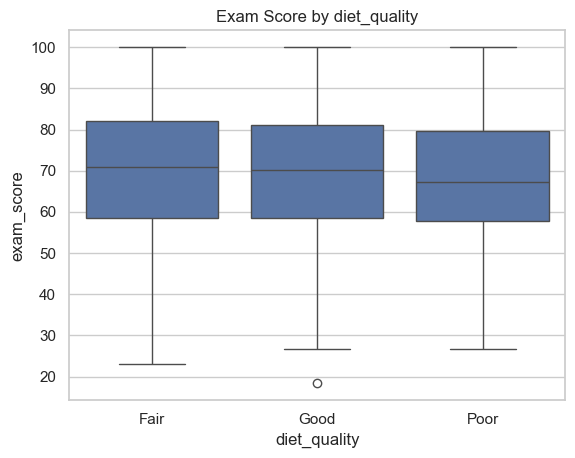

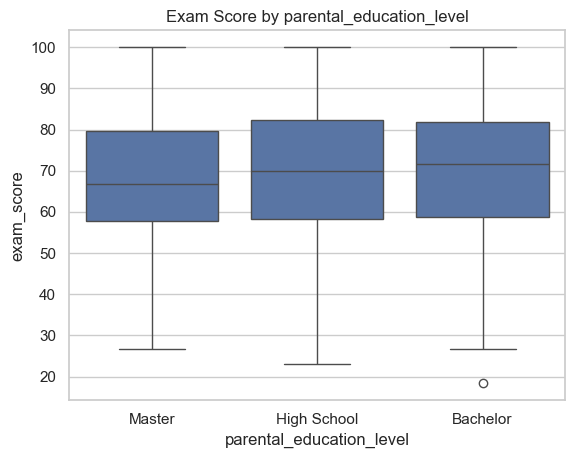

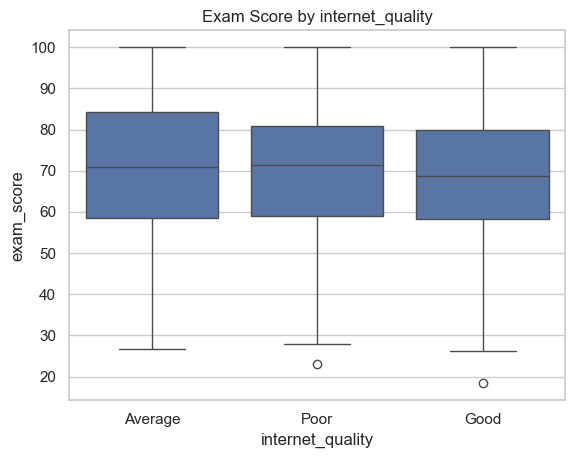

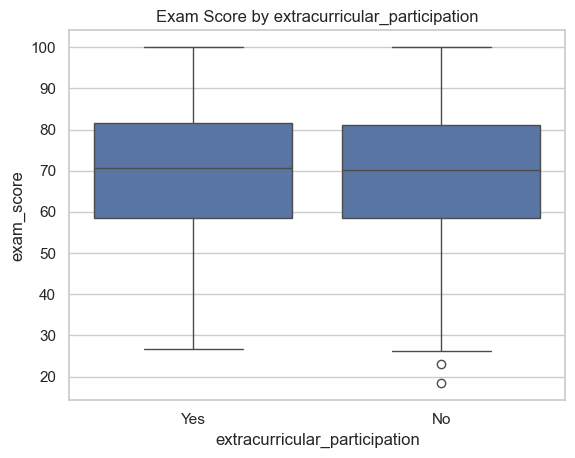

In [21]:
for col in cat_cols:
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.title(f'Exam Score by {col}')
    plt.show()

In [22]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [23]:
features = ['study_hours_per_day','attendance_percentage','mental_health_rating',
            'sleep_hours','part_time_job']
target = 'exam_score'

In [24]:
df_model = df[features + [target]].copy()

In [25]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [26]:
le = LabelEncoder()

In [27]:
df_model['part_time_job'] = le.fit_transform(df_model['part_time_job'])

In [28]:
df_model.head()

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4


In [29]:
df_model.shape

(909, 6)

In [30]:
X = df_model.drop('exam_score', axis=1)
y = df_model['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
models = {
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth':[3, 5, 10], 'min_samples_split':[2, 5]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators':[50, 100], 'max_depth':[5, 10]}
    }, 
    'LinearRegression': {
        'model': LinearRegression(), 
        'params': {} 
    }, 
}

In [32]:
import numpy as np

In [33]:
best_model = []

for name, config, in models.items(): 
    print(f'Training {name}')

    grid = GridSearchCV(config['model'], config['params'],
                        cv=5, scoring='neg_mean_squared_error')
    
    grid.fit(X_train, y_train) # Training
    y_pred = grid.predict(X_test) # Prediction
   
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # RMSE
    r2 = r2_score(y_test, y_pred) # R2_SCORE

    best_model.append({
        'model': name, 
        'best_params': grid.best_params_, 
        'rmse': rmse, 
        'r2_score': r2
    })

Training DecisionTree
Training RandomForest
Training LinearRegression


In [34]:
results_df = pd.DataFrame(best_model)
results_df 

,model,best_params,rmse,r2_score
0,DecisionTree,"{'max_depth': 5, 'min_samples_split': 5}",7.989826,0.764814
1,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",7.199396,0.809046
2,LinearRegression,{},7.190938,0.809494


In [35]:
best_row = results_df.sort_values(by='rmse').iloc[0]
best_row

model          LinearRegression
best_params                  {}
rmse                   7.190938
r2_score               0.809494
Name: 2, dtype: object

In [36]:
best_model_name = best_row['model']
best_model_name

'LinearRegression'

In [37]:
best_model_config = models[best_model_name]
best_model_config

{'model': LinearRegression(), 'params': {}}

In [38]:
final_model = best_model_config['model']

In [39]:
final_model.fit(X, y)

LinearRegression()

In [40]:
final_model.predict(X_test)

array([ 56.6125347 ,  50.42847388,  68.01649762,  74.59529628,
        85.98146352,  63.08078629,  80.04701348,  89.92801771,
        62.76704043,  71.53075848,  54.77872093,  83.1293514 ,
        55.50712337,  56.84795774,  83.44386551,  76.90551635,
        50.09576014,  90.10938622,  83.16135013,  72.9566029 ,
        80.61992577,  91.69729711,  49.28725829,  67.56464235,
        81.74485353,  58.60039915, 102.62470515,  74.41638106,
        61.46176878,  91.82549796,  56.40314637,  81.34776381,
        57.45595147,  64.13092859,  64.48227953,  68.37208385,
        89.69195799,  45.77718556,  62.717919  ,  78.07562614,
        61.85054984,  79.30877704,  70.5947591 ,  66.55221819,
        86.1259658 ,  68.67625259,  54.69003354, 107.4516993 ,
        74.5771561 ,  78.93711347,  59.86149389,  43.87777281,
        58.28779096,  73.79670885,  70.10700083, 102.67076152,
        78.71971636,  63.8141856 ,  76.46225033,  48.67665262,
        82.47701204,  71.17203049,  60.51626214,  74.64

In [41]:
joblib.dump(final_model, 'best_model.pkl')

['best_model.pkl']

In [43]:
joblib.load('Student_Exam_Scores_env/best_model.pkl').predict(X_test)

array([ 56.6125347 ,  50.42847388,  68.01649762,  74.59529628,
        85.98146352,  63.08078629,  80.04701348,  89.92801771,
        62.76704043,  71.53075848,  54.77872093,  83.1293514 ,
        55.50712337,  56.84795774,  83.44386551,  76.90551635,
        50.09576014,  90.10938622,  83.16135013,  72.9566029 ,
        80.61992577,  91.69729711,  49.28725829,  67.56464235,
        81.74485353,  58.60039915, 102.62470515,  74.41638106,
        61.46176878,  91.82549796,  56.40314637,  81.34776381,
        57.45595147,  64.13092859,  64.48227953,  68.37208385,
        89.69195799,  45.77718556,  62.717919  ,  78.07562614,
        61.85054984,  79.30877704,  70.5947591 ,  66.55221819,
        86.1259658 ,  68.67625259,  54.69003354, 107.4516993 ,
        74.5771561 ,  78.93711347,  59.86149389,  43.87777281,
        58.28779096,  73.79670885,  70.10700083, 102.67076152,
        78.71971636,  63.8141856 ,  76.46225033,  48.67665262,
        82.47701204,  71.17203049,  60.51626214,  74.64